In [33]:
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler
from tabulate import tabulate
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np
import seaborn as sns

#### 1. Data
a) Load CC General.csv into a pandas dataframe. Print out the header. Use pandas.DataFrame.describe to summarize the data. Using markdown, explain the meaning of each column and make observations about the dataset.

In [34]:
# Load the CSV file into a pandas DataFrame
data = pd.read_csv('CC_GENERAL.csv')
data.head()

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  C10001    40.900749           0.818182      95.40              0.00   
1  C10002  3202.467416           0.909091       0.00              0.00   
2  C10003  2495.148862           1.000000     773.17            773.17   
3  C10004  1666.670542           0.636364    1499.00           1499.00   
4  C10005   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000                 0              2        1000.0   
1                0.250000                 4              0        7000.0   
2                0.000000                 0             12        7500.0   
3                0.083333                 1              1        7500.0   
4                0.000000                 0              1        1200.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0   201.802084        139.509787          0.000000      12  
1  4103.032597       1072.340217          0.222222      12  
2   622.066742        627.284787          0.000000      12  
3     0.000000               NaN          0.000000      12  
4   678.334763        244.791237          0.000000      12

In [35]:
# Summary of the data
data.describe()

BALANCE  BALANCE_FREQUENCY     PURCHASES  ONEOFF_PURCHASES  \
count   8950.000000        8950.000000   8950.000000       8950.000000   
mean    1564.474828           0.877271   1003.204834        592.437371   
std     2081.531879           0.236904   2136.634782       1659.887917   
min        0.000000           0.000000      0.000000          0.000000   
25%      128.281915           0.888889     39.635000          0.000000   
50%      873.385231           1.000000    361.280000         38.000000   
75%     2054.140036           1.000000   1110.130000        577.405000   
max    19043.138560           1.000000  49039.570000      40761.250000   

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
count             8950.000000   8950.000000          8950.000000   
mean               411.067645    978.871112             0.490351   
std                904.338115   2097.163877             0.401371   
min                  0.000000      0.000000             0.000000   
25%                  0.000000      0.000000             0.083333   
50%                 89.000000      0.000000             0.500000   
75%                468.637500   1113.821139             0.916667   
max              22500.000000  47137.211760             1.000000   

       ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
count                 8950.000000                       8950.000000   
mean                     0.202458                          0.364437   
std                      0.298336                          0.397448   
min                      0.000000                          0.000000   
25%                      0.000000                          0.000000   
50%                      0.083333                          0.166667   
75%                      0.300000                          0.750000   
max                      1.000000                          1.000000   

       CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
count             8950.000000       8950.000000    8950.000000   8949.000000   
mean                 0.135144          3.248827      14.709832   4494.449450   
std                  0.200121          6.824647      24.857649   3638.815725   
min                  0.000000          0.000000       0.000000     50.000000   
25%                  0.000000          0.000000       1.000000   1600.000000   
50%                  0.000000          0.000000       7.000000   3000.000000   
75%                  0.222222          4.000000      17.000000   6500.000000   
max                  1.500000        123.000000     358.000000  30000.000000   

           PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT       TENURE  
count   8950.000000       8637.000000       8950.000000  8950.000000  
mean    1733.143852        864.206542          0.153715    11.517318  
std     2895.063757       2372.446607          0.292499     1.338331  
min        0.000000          0.019163          0.000000     6.000000  
25%      383.276166        169.123707          0.000000    12.000000  
50%      856.901546        312.343947          0.000000    12.000000  
75%     1901.134317        825.485459          0.142857    12.000000  
max    50721.483360      76406.207520          1.000000    12.000000

<span style='color:blue'>  

##### General Observations
- Skewed Distributions: Many columns such as BALANCE, PURCHASES, CREDIT_LIMIT, and PAYMENTS have a large spread and are likely skewed, which could impact clustering and visualization.
- Diverse Behaviors: The dataset captures a wide range of behaviors regarding purchases, payments, and credit usage. Some customers are high spenders or frequently use credit advances, while others use their credit card sparingly.
- Handling Missing Values: There is one missing value in CREDIT_LIMIT and some in MINIMUM_PAYMENTS, which need to be addressed before performing further analysis.
- Frequency-based Features: Columns like PURCHASES_FREQUENCY, ONEOFF_PURCHASES_FREQUENCY, and CASH_ADVANCE_FREQUENCY are scaled from 0 to 1, indicating normalized frequencies that can be useful for clustering behaviors.

</span>

b) Use pandas.DataFrame.info to check if the entries are the correct datatype, and if there are any missing values. Use pandas.DataFrame.duplicates to check for duplicate entries. Fix the dataset so that there are no missing values, duplicate rows, or incorrect data types. Use markdown to make observations and explain what you have done.

In [36]:
# Check the data types and missing values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [37]:
# Check for duplicates
data[data.duplicated()]

Empty DataFrame
Columns: [CUST_ID, BALANCE, BALANCE_FREQUENCY, PURCHASES, ONEOFF_PURCHASES, INSTALLMENTS_PURCHASES, CASH_ADVANCE, PURCHASES_FREQUENCY, ONEOFF_PURCHASES_FREQUENCY, PURCHASES_INSTALLMENTS_FREQUENCY, CASH_ADVANCE_FREQUENCY, CASH_ADVANCE_TRX, PURCHASES_TRX, CREDIT_LIMIT, PAYMENTS, MINIMUM_PAYMENTS, PRC_FULL_PAYMENT, TENURE]
Index: []

In [38]:
# Imputing the missing value of CREDIT_LIMIT with the median as the data for this feature is skewed
median_value = data['CREDIT_LIMIT'].median()
data['CREDIT_LIMIT'].fillna(median_value, inplace=True)
data.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          0
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [39]:
# Validating how many records we have with BALANCE = 0 (if there is no balance, there isn't a minimum payment)
data[data['BALANCE'] == 0].count()

CUST_ID                             80
BALANCE                             80
BALANCE_FREQUENCY                   80
PURCHASES                           80
ONEOFF_PURCHASES                    80
INSTALLMENTS_PURCHASES              80
CASH_ADVANCE                        80
PURCHASES_FREQUENCY                 80
ONEOFF_PURCHASES_FREQUENCY          80
PURCHASES_INSTALLMENTS_FREQUENCY    80
CASH_ADVANCE_FREQUENCY              80
CASH_ADVANCE_TRX                    80
PURCHASES_TRX                       80
CREDIT_LIMIT                        80
PAYMENTS                            80
MINIMUM_PAYMENTS                     6
PRC_FULL_PAYMENT                    80
TENURE                              80
dtype: int64

In [40]:
# Replacing with 0, the null values in MINIMUM_PAYMENTS when the BALANCE is equal to 0
data.loc[data['BALANCE'] == 0, 'MINIMUM_PAYMENTS'] = 0
data.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          0
PAYMENTS                              0
MINIMUM_PAYMENTS                    239
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

##### <span style='color:blue'> According to ['BDO Debt Solutions'](https://debtsolutions.bdo.ca/how-your-credit-card-minimum-payment-is-calculated/), credit card issuers will calculate your minimum payment as a percentage of your total balance, typically between 2% and 3%, or a minimum of $10, whichever amount is higher.</span>

In [41]:
# Based on what was stated before replacing MINIMUM_PAYMENTS values with the maximum value between the 2% of the 
# balance or 10
data['MINIMUM_PAYMENTS'] = data['MINIMUM_PAYMENTS'].fillna(np.maximum(data['BALANCE'] * 0.2, 10))
data.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

<span style='color:blue'>  

##### General Observations
- Correct Data Types: All columns have appropriate data types that match the content they hold (e.g., numeric columns are of type float64 or int64).
- No Duplicates: The dataset was checked for duplicate rows, and none were found, ensuring data integrity and no redundancy.
- Handling Missing Values:
    - For columns with a skewed distribution (e.g., CREDIT_LIMIT), missing values were filled using the median to prevent the influence of outliers.
    - For columns like MINIMUM_PAYMENTS, domain knowledge was used to apply a realistic imputation method, ensuring that the filled values align with expected business practices.
- Final Check: After the imputation process, all missing values were addressed, resulting in a complete dataset ready for further analysis.

</span>

c) Drop the 'CUST_ID' column. Use seaborn.heatmap to display the correlation matrix of the features. Use seaborn.pairplot to generate scatter plots and histograms. Use markdown to make observations. 

In [42]:
data.drop(columns = ['CUST_ID'], inplace = True)
data.head()

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0    40.900749           0.818182      95.40              0.00   
1  3202.467416           0.909091       0.00              0.00   
2  2495.148862           1.000000     773.17            773.17   
3  1666.670542           0.636364    1499.00           1499.00   
4   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000                 0              2        1000.0   
1                0.250000                 4              0        7000.0   
2                0.000000                 0             12        7500.0   
3                0.083333                 1              1        7500.0   
4                0.000000                 0              1        1200.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0   201.802084        139.509787          0.000000      12  
1  4103.032597       1072.340217          0.222222      12  
2   622.066742        627.284787          0.000000      12  
3     0.000000        333.334108          0.000000      12  
4   678.334763        244.791237          0.000000      12

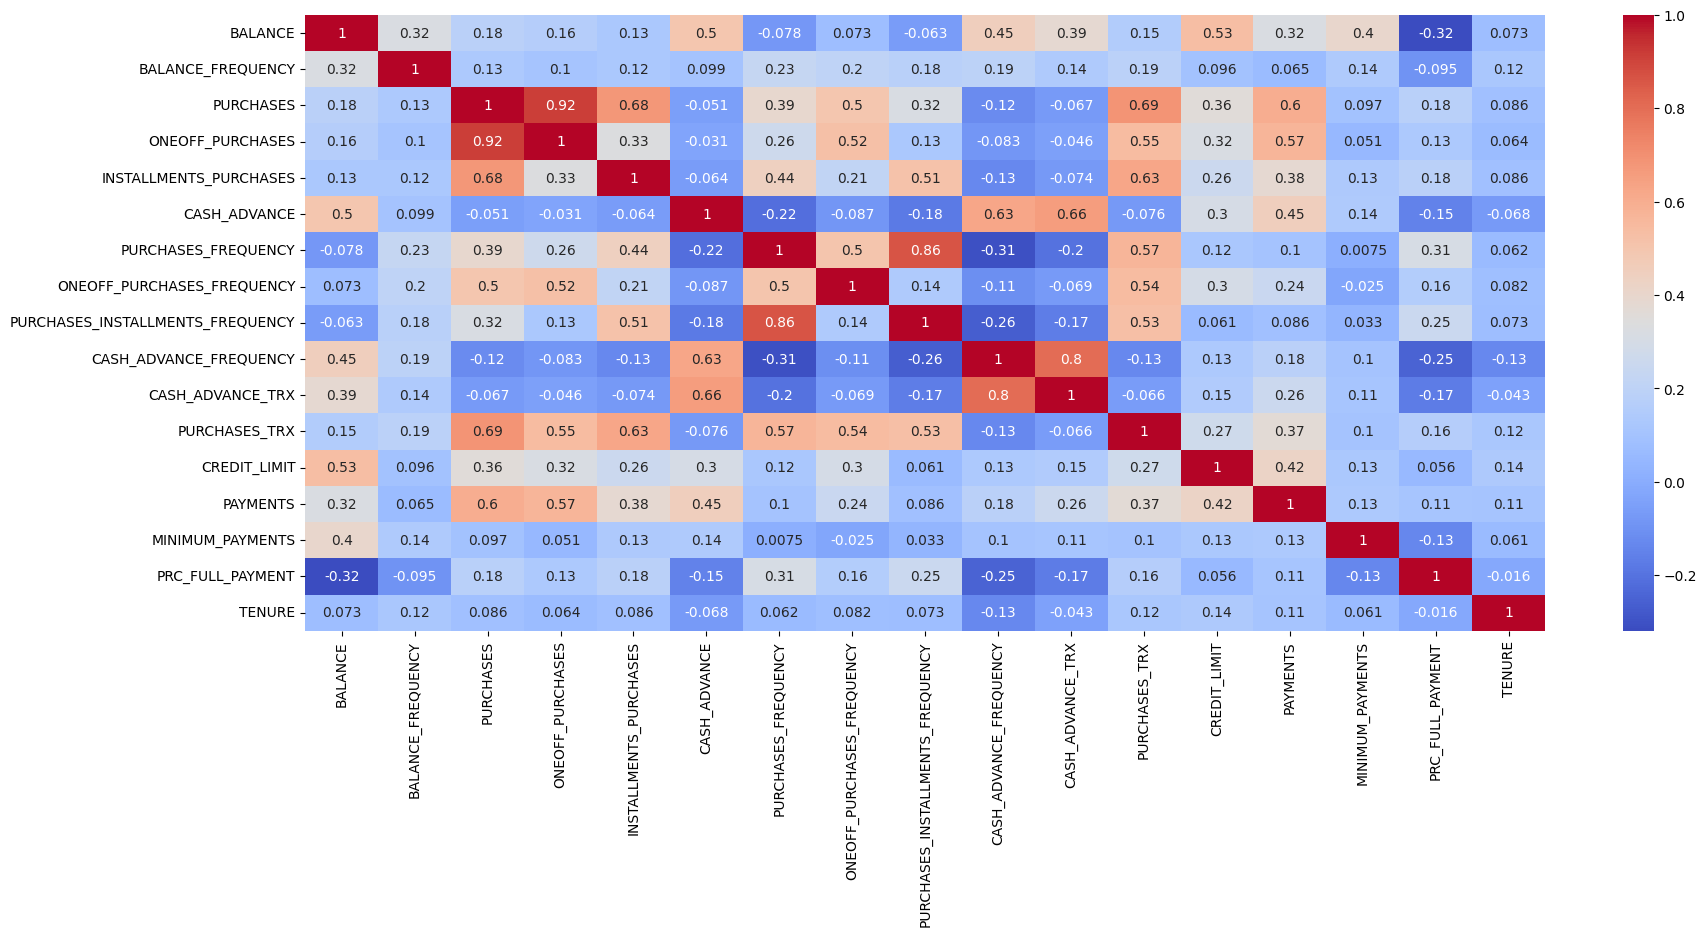

In [43]:
# (using corr function in pandas to obatin correlation of columns), using cmap = 'coolwarm'
# to differentiate high, low, and medium correlations
plt.figure(figsize = (20,8))
sns.heatmap(data.corr(), cmap = 'coolwarm', annot=True)
plt.show()

<Figure size 1000x800 with 0 Axes>

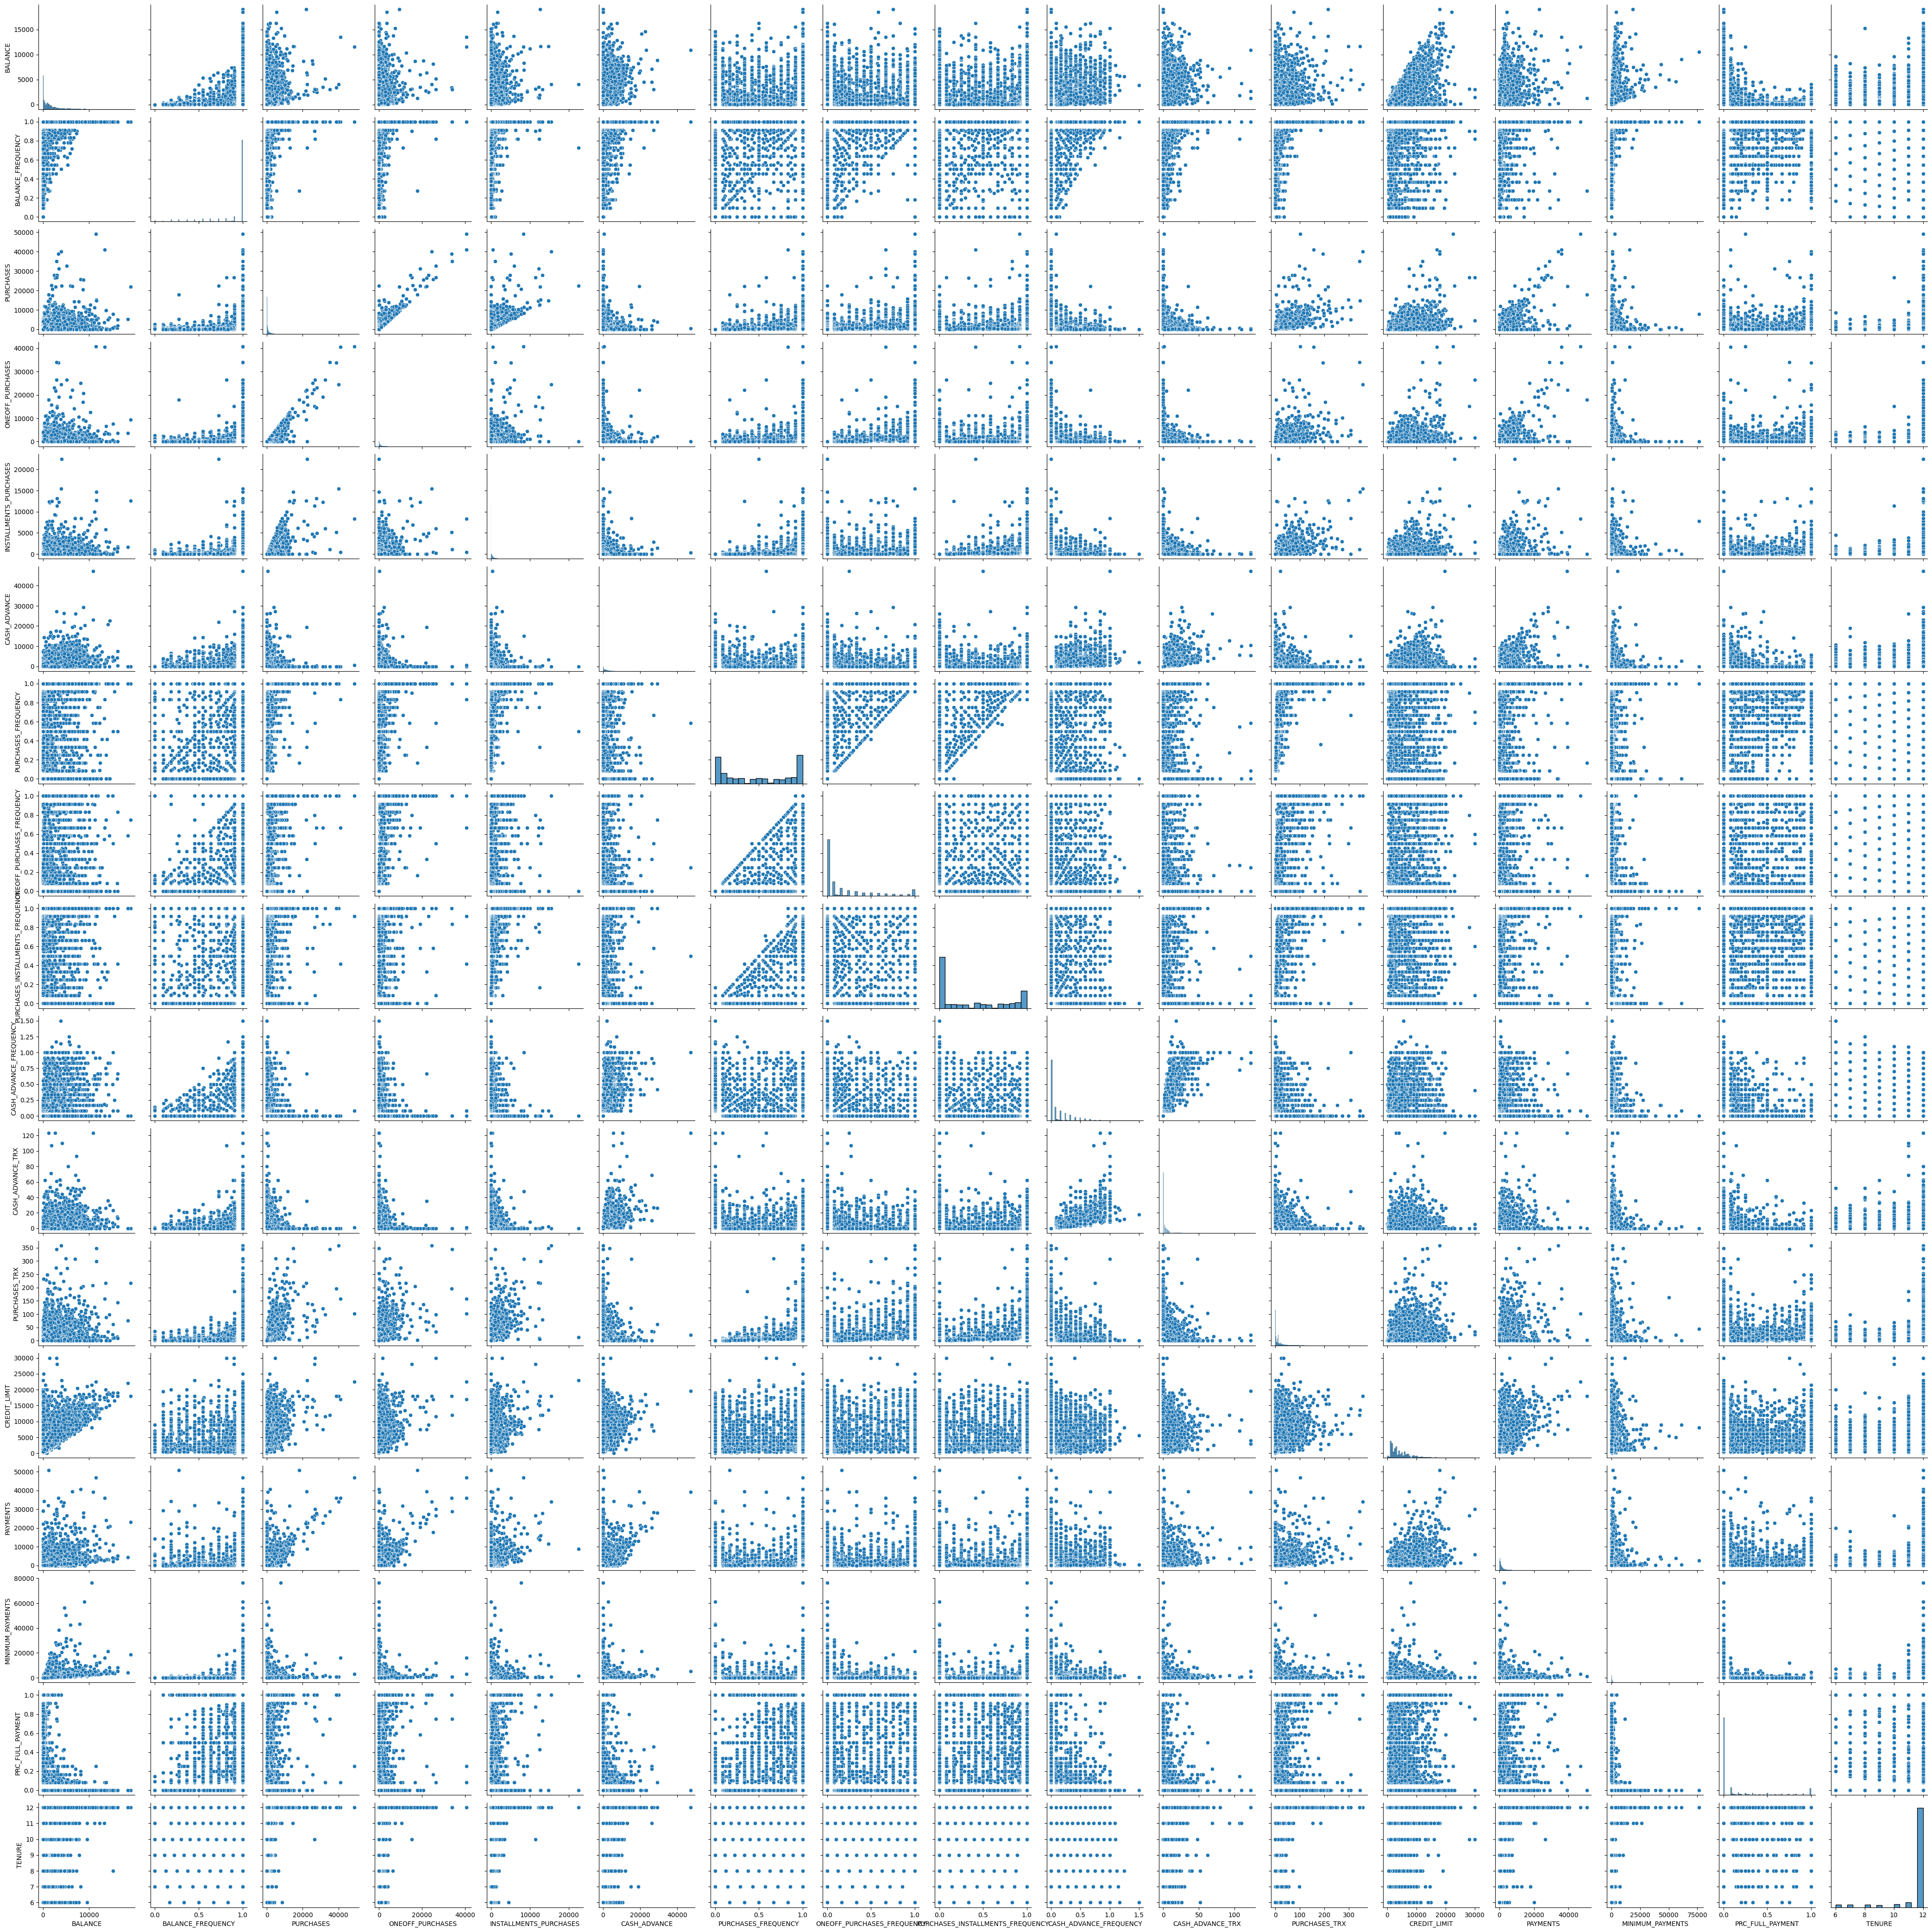

In [44]:
# Using seaborn.pairplot to generate scatterplots and histograms
plt.figure(figsize = (10,8))
sns.pairplot(data)
plt.show()

<span style='color:blue'> 

### The highest correlation (top three) among columns are as follow:

* PURCHASES and ONOFF_PURCHASES
* PURCHASES_TRX and PURCHASES
* PUCHASES and INSTALLMENTS_PURCHASES

#### Note: There is almost a linear relationship between pairs listed before, somehow the two variables change in a similar manner, and changes in one can predict changes in the other.

### The lowest correlation (top three) among columns are as follow:

* PCR_FULL_PAYMENT and BALANCE_FREQUENCY
* CASH_ADVANCE_FREQUENCY and PURCHASES_FREQUENCY
* CASH_ADVANCE_FREQUENCY and PURCHASES_INSTALLMENTS_FREQUENCY

#### Note: There is almost a inverse proposional linear relationship between pairs listed before.
</span>

### 2. PCA
a) Use sklearn.preprocessing.MinMaxScaler to scale the data. Print the header.

In [45]:
# Initializing the MinMaxScaler
scaler = MinMaxScaler()
# Fitting and transforming the data
scaled_data = scaler.fit_transform(data)

# Converting scaled data back to pandas DataFrame for easier handling
scaled_df = pd.DataFrame(scaled_data)

# Verifying scaling printing the header of scaled_df
scaled_df.head()

0         1         2         3        4         5         6   \
0  0.002148  0.818182  0.001945  0.000000  0.00424  0.000000  0.166667   
1  0.168169  0.909091  0.000000  0.000000  0.00000  0.136685  0.000000   
2  0.131026  1.000000  0.015766  0.018968  0.00000  0.000000  1.000000   
3  0.087521  0.636364  0.030567  0.036775  0.00000  0.004366  0.083333   
4  0.042940  1.000000  0.000326  0.000393  0.00000  0.000000  0.083333   

         7         8         9        10        11        12        13  \
0  0.000000  0.083333  0.000000  0.00000  0.005587  0.031720  0.003979   
1  0.000000  0.000000  0.166667  0.03252  0.000000  0.232053  0.080893   
2  1.000000  0.000000  0.000000  0.00000  0.033520  0.248748  0.012264   
3  0.083333  0.000000  0.055555  0.00813  0.002793  0.248748  0.000000   
4  0.083333  0.000000  0.000000  0.00000  0.002793  0.038397  0.013374   

         14        15   16  
0  0.001826  0.000000  1.0  
1  0.014035  0.222222  1.0  
2  0.008210  0.000000  1.0  
3  0.004363  0.000000  1.0  
4  0.003204  0.000000  1.0

b) Use sklearn.decomposition.PCA.fit_transform to do a PCA transformation on the data without specifying the number of components. Print out the explained variance ratios and determine how many components to keep in order to have 95% of the explained variance ratio.

Explained variance ratios:
 [4.95969576e-01 1.40541164e-01 1.28446995e-01 7.67694703e-02
 6.96364691e-02 3.58824538e-02 1.81927206e-02 1.35286998e-02
 6.55557846e-03 5.50898272e-03 2.84118846e-03 1.85839314e-03
 1.26687801e-03 1.22523693e-03 1.05601801e-03 7.20144470e-04
 3.12590752e-08]

Number of components to retain 95% of variance: 7

Explained Variance Ratio:


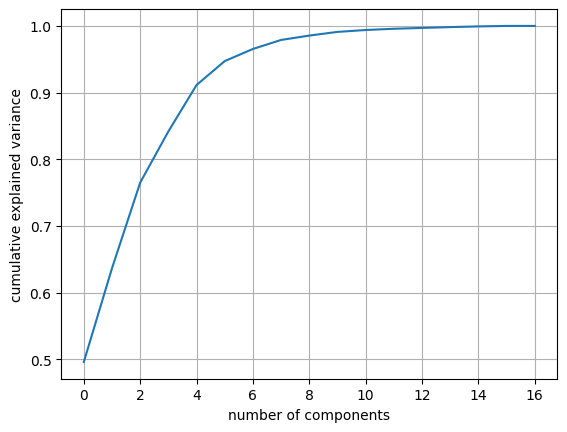

In [46]:
# Initialize PCA
pca = PCA()

# Fit PCA on the cleaned scaled data
pca.fit(scaled_df)

# Calculate the explained variance ratios
explained_variance_ratios = pca.explained_variance_ratio_

# Print the explained variance ratios
print("Explained variance ratios:\n", explained_variance_ratios)

# Calculate cumulative explained variance
cumulative_variance = explained_variance_ratios.cumsum()

# Find the number of components required to retain 95% of the variance
n_components_95 = (cumulative_variance >= 0.95).argmax() + 1
print(f"\nNumber of components to retain 95% of variance: {n_components_95}")


# Printing out the explained_variance_ratio
print("\nExplained Variance Ratio:")
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.grid()

<span style='color:blue'>  

##### General Observations
- Based on the plot above, to capture 95% of the explained variance, we need to retain 7 out of the 16 components of the dataset.
</span>

c) Use sklearn.decomposition.PCA.fit_transform again to do a PCA transformation, this time setting n_components to keep 95% of the explained variance and save this to a new dataframe.

In [47]:
# Calculate the explained variance ratios and cumulative explained variance
explained_variance_ratios = pca.explained_variance_ratio_
cumulative_variance = explained_variance_ratios.cumsum()

# Find the number of components required to retain 95% of the variance
n_components_95 = (cumulative_variance >= 0.95).argmax() + 1

# Initialize PCA with the number of components to retain 95% of the variance
pca_95 = PCA(n_components=n_components_95)

# Perform PCA transformation with 95% variance retention
pca_transformed_data_95 = pca_95.fit_transform(scaled_df)

# Convert the transformed data into a new DataFrame
pca_transformed_df_95 = pd.DataFrame(pca_transformed_data_95)

# Print the first few rows of the new DataFrame
pca_transformed_df_95.head()

0         1         2         3         4         5         6
0 -0.482169 -0.097652 -0.046482 -0.058264  0.110005 -0.171659  0.018609
1 -0.608575 -0.019379  0.082093 -0.218774 -0.099000  0.137017  0.047462
2  0.304508  0.920928  0.012306  0.160075  0.162314 -0.158520 -0.006542
3 -0.588623 -0.005637  0.037053  0.004463  0.223704  0.065404  0.096152
4 -0.554357  0.052984 -0.084182 -0.132815 -0.017036 -0.204465  0.056409

<span style='color:blue'>  

##### General Observations
- The table above shows the transformed dataset after applying PCA, retaining approximately 95% of the explained variance. This is achieved by reducing the data to 7 principal components (columns 0 to 6). Each row corresponds to a record from the original dataset, and each column represents a new component that captures the underlying patterns in the data. These components are combinations of the original features and serve as a compact representation, enabling efficient processing and analysis while preserving most of the data's essential information.
</span>

### 3. Clustering
a) Create at least 12 different clustering models using k-means, hierarchical, and DBSCAN clustering; experiment with different choices of hyperparameters. Calculate the silhouette score for each model and tabulate the results.

In [48]:
def create_kmeans_configs():
    kmeans_configs = []
    for n_clusters in range(4, 11):  # Adjust range as needed
        kmeans_configs.append(('K-means', KMeans(n_clusters=n_clusters, random_state=42, n_init=10)))  # Set n_init explicitly
    return kmeans_configs

def create_dbscan_configs():
    dbscan_configs = []
    eps_values = [0.3, 0.4, 0.5, 0.6]
    min_samples_values = [4, 5, 6, 7]

    for eps in eps_values:
        for min_samples in min_samples_values:
            dbscan_configs.append(('DBSCAN', DBSCAN(eps=eps, min_samples=min_samples)))

    return dbscan_configs

def create_agglomerative_configs():
    agglomerative_configs = []
    linkages = ['ward', 'average', 'complete', 'single']
    for n_clusters in range(4, 11):  # Adjust range as needed
        for linkage in linkages:
            agglomerative_configs.append(('Agglomerative', AgglomerativeClustering(n_clusters=n_clusters, linkage=linkage)))

    return agglomerative_configs

In [49]:
def perform_clustering(data, clustering_configs):
    results = []

    for model_name, model in clustering_configs:
        labels = model.fit_predict(data)

        if len(set(labels)) > 1:
            score = silhouette_score(data, labels)
            results.append([model_name, str(model), score])
        else:
            results.append([model_name, str(model), -1])  # Assign a score of -1 for single cluster cases

    results_df = pd.DataFrame(results, columns=['Model', 'Configuration', 'Silhouette Score'])
    return results_df.sort_values(by='Silhouette Score', ascending=False, na_position='last')


# Data for clustering (PCA-transformed)
data_for_clustering = pca_transformed_df_95  # Replace with your PCA-transformed DataFrame

# Create clustering configurations for each model type
kmeans_configs = create_kmeans_configs()
dbscan_configs = create_dbscan_configs()
agglomerative_configs = create_agglomerative_configs()

# Perform clustering and get the results for each model type
kmeans_results_df = perform_clustering(data_for_clustering, kmeans_configs)
dbscan_results_df = perform_clustering(data_for_clustering, dbscan_configs)
agglomerative_results_df = perform_clustering(data_for_clustering, agglomerative_configs)

# Combine all results into a single DataFrame
combined_results_df = pd.concat([kmeans_results_df, dbscan_results_df, agglomerative_results_df], 
                                  ignore_index=True)

# Ensure the full configuration is displayed
pd.set_option('display.max_colwidth', None)

# Display the combined results
print("Combined Clustering Results:")
combined_results_df

Combined Clustering Results:


Model                                               Configuration  \
0         K-means           KMeans(n_clusters=10, n_init=10, random_state=42)   
1         K-means            KMeans(n_clusters=6, n_init=10, random_state=42)   
2         K-means            KMeans(n_clusters=9, n_init=10, random_state=42)   
3         K-means                          KMeans(n_init=10, random_state=42)   
4         K-means            KMeans(n_clusters=5, n_init=10, random_state=42)   
5         K-means            KMeans(n_clusters=4, n_init=10, random_state=42)   
6         K-means            KMeans(n_clusters=7, n_init=10, random_state=42)   
7          DBSCAN                              DBSCAN(eps=0.6, min_samples=4)   
8          DBSCAN                                             DBSCAN(eps=0.6)   
9          DBSCAN                              DBSCAN(eps=0.6, min_samples=6)   
10         DBSCAN                              DBSCAN(eps=0.6, min_samples=7)   
11         DBSCAN                                       DBSCAN(min_samples=4)   
12         DBSCAN                                                    DBSCAN()   
13         DBSCAN                                       DBSCAN(min_samples=6)   
14         DBSCAN                                       DBSCAN(min_samples=7)   
15         DBSCAN                              DBSCAN(eps=0.4, min_samples=6)   
16         DBSCAN                                             DBSCAN(eps=0.4)   
17         DBSCAN                              DBSCAN(eps=0.4, min_samples=4)   
18         DBSCAN                              DBSCAN(eps=0.4, min_samples=7)   
19         DBSCAN                              DBSCAN(eps=0.3, min_samples=7)   
20         DBSCAN                              DBSCAN(eps=0.3, min_samples=6)   
21         DBSCAN                                             DBSCAN(eps=0.3)   
22         DBSCAN                              DBSCAN(eps=0.3, min_samples=4)   
23  Agglomerative    AgglomerativeClustering(linkage='average', n_clusters=4)   
24  Agglomerative    AgglomerativeClustering(linkage='average', n_clusters=5)   
25  Agglomerative    AgglomerativeClustering(linkage='average', n_clusters=6)   
26  Agglomerative    AgglomerativeClustering(linkage='average', n_clusters=7)   
27  Agglomerative    AgglomerativeClustering(linkage='average', n_clusters=8)   
28  Agglomerative   AgglomerativeClustering(linkage='average', n_clusters=10)   
29  Agglomerative    AgglomerativeClustering(linkage='average', n_clusters=9)   
30  Agglomerative                       AgglomerativeClustering(n_clusters=9)   
31  Agglomerative                      AgglomerativeClustering(n_clusters=10)   
32  Agglomerative                       AgglomerativeClustering(n_clusters=8)   
33  Agglomerative                       AgglomerativeClustering(n_clusters=4)   
34  Agglomerative                       AgglomerativeClustering(n_clusters=7)   
35  Agglomerative     AgglomerativeClustering(linkage='single', n_clusters=4)   
36  Agglomerative                       AgglomerativeClustering(n_clusters=6)   
37  Agglomerative     AgglomerativeClustering(linkage='single', n_clusters=5)   
38  Agglomerative                       AgglomerativeClustering(n_clusters=5)   
39  Agglomerative     AgglomerativeClustering(linkage='single', n_clusters=6)   
40  Agglomerative  AgglomerativeClustering(linkage='complete', n_clusters=10)   
41  Agglomerative   AgglomerativeClustering(linkage='complete', n_clusters=9)   
42  Agglomerative     AgglomerativeClustering(linkage='single', n_clusters=7)   
43  Agglomerative     AgglomerativeClustering(linkage='single', n_clusters=8)   
44  Agglomerative   AgglomerativeClustering(linkage='complete', n_clusters=8)   
45  Agglomerative     AgglomerativeClustering(linkage='single', n_clusters=9)   
46  Agglomerative   AgglomerativeClustering(linkage='complete', n_clusters=6)   
47  Agglomerative   AgglomerativeClustering(linkage='complete', n_clusters=7)   
48  Agglomerative    AgglomerativeClusterin

b) Select the best model for the use case and justify your choice in markdown. How does the silhouette score compare with your best model from assignment 2?

<span style='color:blue'>  

##### Justified Answer
| Model   | Configuration                              | Silhouette Score |
|---------|--------------------------------------------|------------------|
| K-means | KMeans(n_clusters=10, n_init=10, random_state=42)      | 0.362655        |

- This model is selected as the best clustering model because it achieved the highest silhouette. This high score indicates well-defined and separated clusters, suggesting that the data naturally divides into two distinct groups.

##### Comparison Summary
- The best silhouette score from Assignment 2 is 0.373228 with n_clusters=4.
- In this analysis, the K-means model with 6 clusters has a slightly lower silhouette score. While this indicates a reasonable clustering performance, it suggests that further tuning of parameters or testing additional clustering algorithms could be beneficial for achieving a higher silhouette score and potentially outperforming the previous best model.

</span>

### 4. Conclusion
a) Generate a scatter plot of the first two columns of the transformed data. Use the model predictions to colour the points according to the cluster they belong to. Use markdown to comment on the plot, and how it compares with the plot from assignment 2.

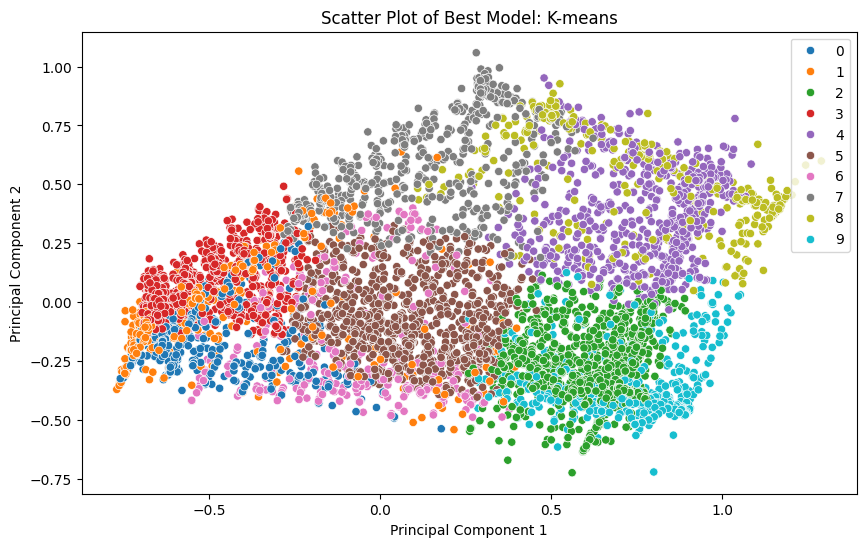

In [50]:
# Identify the best model
best_model_info = combined_results_df.iloc[0]
best_model_name = best_model_info['Model']
best_model_config = eval(best_model_info['Configuration'])  # Convert the string representation back to the model object

# Fit the best model on the data
best_model = best_model_config
cluster_labels = best_model.fit_predict(data_for_clustering)

# Add the cluster labels to the DataFrame for visualization
pca_transformed_df_95['Cluster'] = cluster_labels

# Generate a scatter plot for the first two columns of the PCA-transformed data
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=pca_transformed_df_95.iloc[:, 0], 
    y=pca_transformed_df_95.iloc[:, 1], 
    hue=pca_transformed_df_95['Cluster'], 
    palette='tab10'
)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title(f'Scatter Plot of Best Model: {best_model_name}')
plt.legend(loc='upper right', frameon=True)
plt.show()

<span style='color:blue'>  

##### General Observations

The current scatter plot demonstrates significant improvements in cluster separation, density, and cohesion compared to the previous analysis in Assignment 2. These enhancements can provide deeper insights into customer segments and guide more effective marketing strategies, ultimately leading to better engagement and profitability. The adjustments made in tuning the clustering algorithm, combined with the PCA transformation, have resulted in a more accurate representation of the underlying patterns in the dataset.

</span>

b) Generate a histogram that shows the number of elements in each cluster. Use markdown to comment on the histogram.

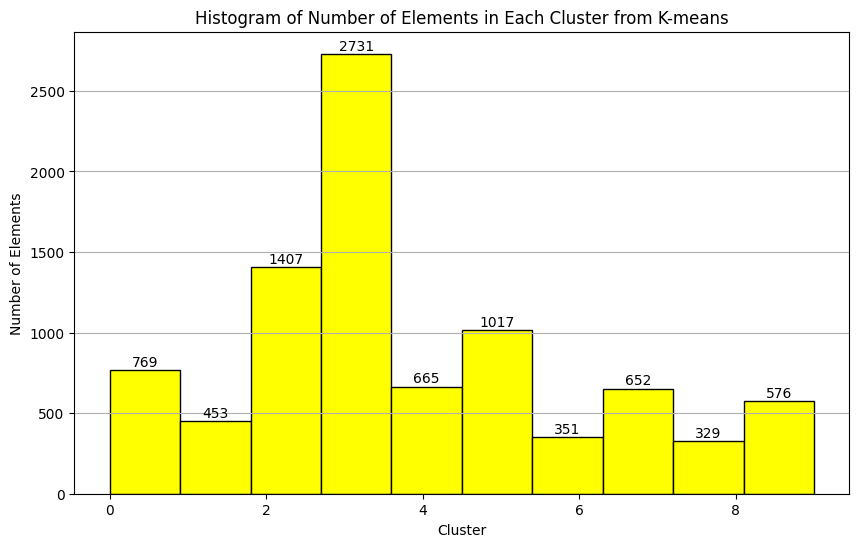

In [51]:
# Get the cluster labels from the fitted best model
cluster_labels = best_model.labels_

# Generate the histogram based on cluster labels
plt.figure(figsize=(10, 6))
_, _, patches = plt.hist(cluster_labels, 
                         bins=len(set(cluster_labels)), 
                         align="mid", color='yellow',
                         edgecolor='black')

# Annotate the histogram with counts
for pp in patches:
    x = (pp.get_x() + pp.get_x() + pp.get_width()) / 2
    y = pp.get_height() + 5  # Adjust for better visibility
    plt.text(x, y, int(pp.get_height()), ha='center', va='bottom')

# Set labels and title
plt.xlabel('Cluster')
plt.ylabel('Number of Elements')
plt.title(f'Histogram of Number of Elements in Each Cluster from {best_model_name}')
plt.grid(axis='y')
plt.show()

<span style='color:blue'>  

##### General Observations

1. Distribution of Customers:
    - The histogram reveals a skewed distribution of customers across the clusters, indicating that certain segments have a significantly higher number of customers compared to others. This suggests that the customer base is not evenly distributed among the different clusters.

2. Dominance of Cluster 2:
    - Cluster 2 stands out as the most populous cluster, containing 2,731 customers. This suggests that this segment may represent a common behavior or characteristic among a large portion of the customer base. Understanding this cluster's specific attributes could yield valuable insights for marketing strategies.

3. Moderate Size Clusters:
    - Clusters 1 and 4 also have a substantial number of customers (1,407 and 1,017, respectively), indicating that they represent significant segments that may require tailored marketing approaches. These clusters may share similarities that differentiate them from the larger segment but still warrant focused strategies.

4. Smaller Clusters:
    - Clusters 5, 6, 8, and 9 show relatively low customer counts, ranging from 329 to 576. These smaller clusters might represent niche segments or unique customer profiles. Targeting these groups with specific marketing strategies could help in enhancing engagement and customer satisfaction.

5. Potential for Segmentation Strategy:
    - The presence of larger and smaller clusters indicates an opportunity for differentiated marketing strategies. Larger clusters might benefit from broad-reaching campaigns, while smaller clusters could be targeted with more specialized, personalized marketing efforts to drive engagement and conversions.

6. Importance of Understanding Cluster Characteristics:
    - To effectively leverage these segments, it is crucial to analyze the characteristics and behaviors associated with each cluster. Understanding what drives customer engagement in each segment can lead to more effective marketing strategies and better resource allocation.

</span>

c) Create a separate dataframe from the untransformed data for each cluster.

In [52]:
# Assign cluster labels to a new column named 'CLUSTER' in the dataframe
data['CLUSTER'] = cluster_labels

In [53]:
# Creating a separate dataframe for Cluster 0
cluster_a = data[data['CLUSTER'] == 0]
cluster_a = cluster_a.drop('CLUSTER', axis = 1)
cluster_a.head()

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
3   1666.670542           0.636364    1499.00           1499.00   
9    152.225975           0.545455    1281.60           1281.60   
17    41.089489           0.454545     519.00              0.00   
39  1411.602230           0.454545     963.24            963.24   
63     7.152356           0.090909     840.00            840.00   

    INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
3                      0.0    205.788017             0.083333   
9                      0.0      0.000000             0.166667   
17                   519.0      0.000000             0.416667   
39                     0.0   6173.682877             0.083333   
63                     0.0      0.000000             0.083333   

    ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
3                     0.083333                          0.000000   
9                     0.166667                          0.000000   
17                    0.000000                          0.333333   
39                    0.083333                          0.000000   
63                    0.083333                          0.000000   

    CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
3                 0.083333                 1              1        7500.0   
9                 0.000000                 0              3       11000.0   
17                0.000000                 0              8        2500.0   
39                0.333333                 6              6        7500.0   
63                0.000000                 0              1        1600.0   

        PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
3       0.000000        333.334108          0.000000      12  
9    1164.770591        100.302262          0.000000      12  
17    254.590662         73.203221          0.250000      12  
39  20071.075440        719.948985          0.333333      12  
63      0.000000         10.000000          0.000000      12

In [54]:
# Creating a separate dataframe for Cluster 1
cluster_b = data[data['CLUSTER'] == 1]
cluster_b = cluster_b.drop('CLUSTER', axis = 1)
cluster_b.head()

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
16  2072.074354              0.875       0.00              0.00   
46   474.447149              0.500     109.74              0.00   
50  4931.331857              1.000     901.42            646.07   
66   809.847455              0.875       0.00              0.00   
72   656.013010              1.000       0.00              0.00   

    INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
16                    0.00   2784.274703                0.000   
46                  109.74   1013.659552                0.375   
50                  255.35   8530.648614                0.625   
66                    0.00    908.423608                0.000   
72                    0.00   1474.349901                0.000   

    ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
16                       0.000                              0.00   
46                       0.000                              0.25   
50                       0.375                              0.25   
66                       0.000                              0.00   
72                       0.000                              0.00   

    CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
16                   0.250                 3              0        3000.0   
46                   0.125                 1              3        1700.0   
50                   0.875                37              9       12000.0   
66                   0.125                 1              0        1500.0   
72                   0.125                 3              0        7000.0   

       PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
16   391.974562        376.579631              0.00       8  
46   176.013005        147.199792              0.00       8  
50  8113.297346       1012.415961              0.00       8  
66   146.074769        179.412493              0.00       8  
72   910.457985        140.983193              0.25       8

In [55]:
# Creating a separate dataframe for Cluster 2
cluster_c = data[data['CLUSTER'] == 2]
cluster_c = cluster_c.drop('CLUSTER', axis = 1)
cluster_c.head()

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
7   1823.652743                1.0     436.20              0.00   
10  1293.124939                1.0     920.12              0.00   
12  1516.928620                1.0    3217.99           2500.23   
13   921.693369                1.0    2137.93            419.96   
19  3577.970933                1.0     398.64              0.00   

    INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
7                   436.20           0.0                 1.00   
10                  920.12           0.0                 1.00   
12                  717.76           0.0                 1.00   
13                 1717.97           0.0                 0.75   
19                  398.64           0.0                 1.00   

    ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
7                     0.000000                          1.000000   
10                    0.000000                          1.000000   
12                    0.250000                          0.916667   
13                    0.166667                          0.750000   
19                    0.000000                          1.000000   

    CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
7                      0.0                 0             12        2300.0   
10                     0.0                 0             12        1200.0   
12                     0.0                 0             26        3000.0   
13                     0.0                 0             26        7500.0   
19                     0.0                 0             12        4000.0   

       PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
7    679.065082        532.033990          0.000000      12  
10  1083.301007       2172.697765          0.000000      12  
12   608.263689        490.207013          0.250000      12  
13  1655.891435        251.137986          0.083333      12  
19  1053.980464      12465.549380          0.000000      12

In [56]:
# Creating a separate dataframe for Cluster 3
cluster_d = data[data['CLUSTER'] == 3]
cluster_d = cluster_d.drop('CLUSTER', axis = 1)
cluster_d.head()

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0     40.900749           0.818182      95.40              0.00   
1   3202.467416           0.909091       0.00              0.00   
4    817.714335           1.000000      16.00             16.00   
11   630.794744           0.818182    1492.18           1492.18   
14  2772.772734           1.000000       0.00              0.00   

    INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                     95.4      0.000000             0.166667   
1                      0.0   6442.945483             0.000000   
4                      0.0      0.000000             0.083333   
11                     0.0      0.000000             0.250000   
14                     0.0    346.811390             0.000000   

    ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                     0.000000                          0.083333   
1                     0.000000                          0.000000   
4                     0.083333                          0.000000   
11                    0.250000                          0.000000   
14                    0.000000                          0.000000   

    CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                 0.000000                 0              2        1000.0   
1                 0.250000                 4              0        7000.0   
4                 0.000000                 0              1        1200.0   
11                0.000000                 0              6        2000.0   
14                0.083333                 1              0        3000.0   

       PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0    201.802084        139.509787          0.000000      12  
1   4103.032597       1072.340217          0.222222      12  
4    678.334763        244.791237          0.000000      12  
11   705.618627        155.549069          0.000000      12  
14   805.647974        989.962866          0.000000      12

In [57]:
# Creating a separate dataframe for Cluster 4
cluster_e = data[data['CLUSTER'] == 4]
cluster_e = cluster_e.drop('CLUSTER', axis = 1)
cluster_e.head()

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
21  6369.531318           1.000000    6359.95           5910.04   
37  4047.480828           1.000000    2380.55           1642.17   
57  2386.330629           1.000000    5217.62           4789.09   
71  2990.422186           0.909091    4523.27           1664.09   
86  7069.950386           1.000000    1603.78           1445.14   

    INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
21                  449.91    229.028245             1.000000   
37                  738.38   1697.660901             0.750000   
57                  428.53      0.000000             0.916667   
71                 2859.18  27296.485760             0.666667   
86                  158.64   5626.004046             1.000000   

    ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
21                    0.916667                          1.000000   
37                    0.500000                          0.750000   
57                    0.916667                          0.500000   
71                    0.500000                          0.583333   
86                    0.833333                          1.000000   

    CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
21                0.333333                 6             92       11250.0   
37                0.333333                 7             41        5000.0   
57                0.000000                 0             42        7500.0   
71                0.833333                27             33        7000.0   
86                0.750000                23             23       11000.0   

        PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
21   2077.959051       1659.775075          0.000000      12  
37   1617.894416       1541.141605          0.000000      12  
57   5678.729613       1311.514878          0.083333      12  
71  28232.694460       1107.030803          0.454545      12  
86   4589.873897       1876.262988          0.000000      12

In [58]:
# Creating a separate dataframe for Cluster 5
cluster_f = data[data['CLUSTER'] == 5]
cluster_f = cluster_f.drop('CLUSTER', axis = 1)
cluster_f.head()

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
5   1809.828751                1.0    1333.28              0.00   
8   1014.926473                1.0     861.49            661.49   
15  6886.213231                1.0    1611.70              0.00   
18  1989.072228                1.0     504.35            166.00   
20  2016.684686                1.0     176.68              0.00   

    INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
5                  1333.28      0.000000             0.666667   
8                   200.00      0.000000             0.333333   
15                 1611.70   2301.491267             0.500000   
18                  338.35      0.000000             0.666667   
20                  176.68      0.000000             0.666667   

    ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
5                     0.000000                          0.583333   
8                     0.083333                          0.250000   
15                    0.000000                          0.500000   
18                    0.083333                          0.583333   
20                    0.000000                          0.666667   

    CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
5                 0.000000                 0              8        1800.0   
8                 0.000000                 0              5        7000.0   
15                0.166667                 4             11        8000.0   
18                0.000000                 0              9       13000.0   
20                0.000000                 0              8        2000.0   

       PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
5   1400.057770       2407.246035               0.0      12  
8    688.278568        311.963409               0.0      12  
15  1993.439277       2109.906490               0.0      12  
18  1720.837373        744.613395               0.0      12  
20   223.068600      13557.297260               0.0      12

Use pandas.DataFrame.describe to describe each cluster.

In [59]:
cluster_a.describe()

BALANCE  BALANCE_FREQUENCY     PURCHASES  ONEOFF_PURCHASES  \
count   769.000000         769.000000    769.000000        769.000000   
mean    178.097437           0.332785    290.986931        239.116151   
std     394.695021           0.180536    788.983772        780.261893   
min       0.000000           0.000000      0.000000          0.000000   
25%       6.697211           0.181818      0.000000          0.000000   
50%      30.880470           0.363636     80.000000          0.000000   
75%     163.335524           0.454545    300.000000        220.500000   
max    5347.377116           0.700000  17945.000000      17945.000000   

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
count              769.000000    769.000000           769.000000   
mean                51.961157    588.622248             0.132444   
std                143.038644   1334.141194             0.132096   
min                  0.000000      0.000000             0.000000   
25%                  0.000000      0.000000             0.000000   
50%                  0.000000      0.000000             0.083333   
75%                 40.000000    566.943998             0.181818   
max               1859.340000  14371.787890             0.666667   

       ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
count                  769.000000                        769.000000   
mean                     0.065494                          0.064049   
std                      0.088914                          0.119520   
min                      0.000000                          0.000000   
25%                      0.000000                          0.000000   
50%                      0.000000                          0.000000   
75%                      0.083333                          0.083333   
max                      0.583333                          0.666667   

       CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
count              769.000000        769.000000     769.000000    769.000000   
mean                 0.052431          1.146944       2.202861   3874.945817   
std                  0.085247          2.447468       2.899433   3386.371353   
min                  0.000000          0.000000       0.000000    300.000000   
25%                  0.000000          0.000000       0.000000   1500.000000   
50%                  0.000000          0.000000       1.000000   3000.000000   
75%                  0.083333          1.000000       3.000000   5000.000000   
max                  0.416667         24.000000      31.000000  23000.000000   

           PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT      TENURE  
count    769.000000        769.000000        769.000000  769.000000  
mean    1422.699849        161.371636          0.063108   11.733420  
std     3551.833950        275.164985          0.128930    0.772536  
min        0.000000          0.000000          0.000000    8.000000  
25%      114.614967         30.179409          0.000000   12.000000  
50%      362.012001         86.885269          0.000000   12.000000  
75%     1132.076982        168.008886          0.000000   12.000000  
max    50721.483360       3614.801495          0.500000   12.000000

In [60]:
cluster_b.describe()

BALANCE  BALANCE_FREQUENCY    PURCHASES  ONEOFF_PURCHASES  \
count    453.000000         453.000000   453.000000        453.000000   
mean    1413.834941           0.782958   286.874481        244.628918   
std     1687.351965           0.230041   587.706495        563.220926   
min        0.000000           0.000000     0.000000          0.000000   
25%      264.566591           0.666667     0.000000          0.000000   
50%      912.857498           0.857143     0.000000          0.000000   
75%     1943.792266           1.000000   319.340000        204.270000   
max    15258.225900           1.000000  4139.560000       4139.560000   

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
count              453.000000    453.000000           453.000000   
mean                42.245563   1912.863777             0.178451   
std                144.500452   2300.948074             0.240163   
min                  0.000000      0.000000             0.000000   
25%                  0.000000    135.256159             0.000000   
50%                  0.000000   1159.447747             0.000000   
75%                  0.000000   2686.074313             0.333333   
max               1320.000000  14926.790590             0.857143   

       ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
count                  453.000000                        453.000000   
mean                     0.106751                          0.066497   
std                      0.167285                          0.164941   
min                      0.000000                          0.000000   
25%                      0.000000                          0.000000   
50%                      0.000000                          0.000000   
75%                      0.166667                          0.000000   
max                      0.833333                          0.714286   

       CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
count              453.000000        453.000000     453.000000    453.000000   
mean                 0.284440          5.366446       2.580574   3197.571744   
std                  0.259992          7.283022       5.024345   2818.806284   
min                  0.000000          0.000000       0.000000    300.000000   
25%                  0.125000          1.000000       0.000000   1200.000000   
50%                  0.222222          3.000000       0.000000   2500.000000   
75%                  0.428571          7.000000       3.000000   4000.000000   
max                  1.500000         62.000000      54.000000  19000.000000   

           PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT      TENURE  
count    453.000000        453.000000        453.000000  453.000000  
mean     853.774195        451.236139          0.041171    7.315673  
std     1785.011065        821.191236          0.117386    1.080661  
min        0.000000          0.000000          0.000000    6.000000  
25%      147.826185        105.350665          0.000000    6.000000  
50%      302.866454        223.182313          0.000000    7.000000  
75%      789.728968        461.365626          0.000000    8.000000  
max    19998.389690      10057.561920          1.000000   10.000000

In [61]:
cluster_c.describe()

BALANCE  BALANCE_FREQUENCY     PURCHASES  ONEOFF_PURCHASES  \
count   1407.000000        1407.000000   1407.000000       1407.000000   
mean    1369.132126           0.923628   1061.171016        235.171656   
std     1888.405903           0.212330   1175.034240        544.116015   
min        0.000000           0.000000     12.000000          0.000000   
25%      122.222183           1.000000    357.555000          0.000000   
50%      786.483086           1.000000    636.410000          0.000000   
75%     1726.040226           1.000000   1365.180000        221.665000   
max    16115.596400           1.000000  14686.100000       6345.650000   

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
count             1407.000000   1407.000000          1407.000000   
mean               826.358643    615.224306             0.953870   
std                918.547349   1594.027805             0.073415   
min                 12.000000      0.000000             0.727273   
25%                304.560000      0.000000             0.916667   
50%                536.000000      0.000000             1.000000   
75%               1030.595000    329.886116             1.000000   
max              14686.100000  16323.642430             1.000000   

       ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
count                 1407.000000                       1407.000000   
mean                     0.082983                          0.918673   
std                      0.120526                          0.100258   
min                      0.000000                          0.571429   
25%                      0.000000                          0.833333   
50%                      0.000000                          1.000000   
75%                      0.166667                          1.000000   
max                      0.500000                          1.000000   

       CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
count             1407.000000       1407.000000    1407.000000   1407.000000   
mean                 0.084752          2.007107      23.221038   3672.778962   
std                  0.164826          4.837320      22.664701   3059.826931   
min                  0.000000          0.000000       0.000000    450.000000   
25%                  0.000000          0.000000      12.000000   1500.000000   
50%                  0.000000          0.000000      16.000000   2500.000000   
75%                  0.083333          2.000000      27.000000   5000.000000   
max                  1.000000         61.000000     347.000000  18000.000000   

           PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT       TENURE  
count   1407.000000       1407.000000       1407.000000  1407.000000  
mean    1424.108863       1216.140117          0.060581    11.582090  
std     2049.197311       3884.727529          0.109945     1.265661  
min        0.000000          0.000000          0.000000     6.000000  
25%      372.703764        166.035158          0.000000    12.000000  
50%      832.687649        309.542834          0.000000    12.000000  
75%     1711.563294       1006.873497          0.083333    12.000000  
max    40627.595240      76406.207520          0.416667    12.000000

In [62]:
cluster_d.describe()

BALANCE  BALANCE_FREQUENCY     PURCHASES  ONEOFF_PURCHASES  \
count   2731.000000        2731.000000   2731.000000       2731.000000   
mean    2302.945806           0.976682    185.927697        169.056840   
std     2153.047738           0.065511    686.318100        676.775019   
min        0.488050           0.636364      0.000000          0.000000   
25%      917.980038           1.000000      0.000000          0.000000   
50%     1556.376158           1.000000      0.000000          0.000000   
75%     2965.079681           1.000000    150.000000        115.725000   
max    14581.459140           1.000000  22101.780000      22101.780000   

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
count             2731.000000   2731.000000          2731.000000   
mean                16.967744   1666.698504             0.073713   
std                 98.014116   2517.391199             0.104362   
min                  0.000000      0.000000             0.000000   
25%                  0.000000     91.911917             0.000000   
50%                  0.000000    748.780280             0.000000   
75%                  0.000000   2242.718221             0.100000   
max               3000.000000  26194.049540             0.416667   

       ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
count                 2731.000000                       2731.000000   
mean                     0.057216                          0.016079   
std                      0.092095                          0.049322   
min                      0.000000                          0.000000   
25%                      0.000000                          0.000000   
50%                      0.000000                          0.000000   
75%                      0.083333                          0.000000   
max                      0.416667                          0.272727   

       CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
count             2731.000000       2731.000000    2731.000000   2731.000000   
mean                 0.234362          5.734163       1.422556   4301.838598   
std                  0.214712          8.462306       2.862180   3349.034177   
min                  0.000000          0.000000       0.000000     50.000000   
25%                  0.083333          1.000000       0.000000   1650.000000   
50%                  0.166667          3.000000       0.000000   3000.000000   
75%                  0.333333          7.000000       2.000000   6000.000000   
max                  1.100000        123.000000      40.000000  19000.000000   

           PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT       TENURE  
count   2731.000000       2731.000000       2731.000000  2731.000000  
mean    1561.600629       1102.660540          0.020784    11.875137  
std     2389.675455       2623.786804          0.057449     0.413341  
min        0.000000          5.038210          0.000000    10.000000  
25%      416.371136        287.867361          0.000000    12.000000  
50%      788.245672        533.405391          0.000000    12.000000  
75%     1663.575537       1093.075199          0.000000    12.000000  
max    39461.965800      61031.618600          0.636364    12.000000

In [63]:
cluster_e.describe()

BALANCE  BALANCE_FREQUENCY     PURCHASES  ONEOFF_PURCHASES  \
count    665.000000         665.000000    665.000000        665.000000   
mean    3143.981314           0.989637   3812.391805       2463.834962   
std     2991.132926           0.058188   3950.621253       3272.807771   
min        1.198223           0.181818    253.370000        139.020000   
25%      916.637780           1.000000   1804.090000        991.580000   
50%     2282.814895           1.000000   2776.090000       1645.870000   
75%     4507.000722           1.000000   4544.700000       2847.800000   
max    19043.138560           1.000000  49039.570000      40761.250000   

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
count              665.000000    665.000000           665.000000   
mean              1348.556842   1084.495262             0.966931   
std               1513.544972   2844.917863             0.063485   
min                 57.000000      0.000000             0.666667   
25%                477.520000      0.000000             0.916667   
50%                904.280000      0.000000             1.000000   
75%               1623.010000    951.294749             1.000000   
max              12738.470000  29282.109150             1.000000   

       ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
count                  665.000000                        665.000000   
mean                     0.736548                          0.838406   
std                      0.206230                          0.180399   
min                      0.250000                          0.250000   
25%                      0.583333                          0.666667   
50%                      0.750000                          0.916667   
75%                      0.916667                          1.000000   
max                      1.000000                          1.000000   

       CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
count              665.000000        665.000000     665.000000    665.000000   
mean                 0.133862          3.676692      57.512782   7715.187970   
std                  0.217201          7.922772      40.328324   4325.680113   
min                  0.000000          0.000000      12.000000    600.000000   
25%                  0.000000          0.000000      31.000000   4500.000000   
50%                  0.000000          0.000000      45.000000   7000.000000   
75%                  0.166667          4.000000      73.000000  10000.000000   
max                  1.000000         62.000000     308.000000  30000.000000   

           PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT      TENURE  
count    665.000000        665.000000        665.000000  665.000000  
mean    3892.344144       1209.725552          0.058753   11.852632  
std     4747.758317       1894.730241          0.114162    0.744010  
min        0.000000         14.012997          0.000000    6.000000  
25%     1367.537734        280.821958          0.000000   12.000000  
50%     2384.646953        643.861607          0.000000   12.000000  
75%     4416.412680       1366.869273          0.083333   12.000000  
max    46930.598240      21235.065300          0.545455   12.000000

In [64]:
cluster_f.describe()

BALANCE  BALANCE_FREQUENCY     PURCHASES  ONEOFF_PURCHASES  \
count   1017.000000        1017.000000   1017.000000       1017.000000   
mean    1511.059829           0.919675    749.288643        305.288220   
std     2022.404083           0.145411   1102.909720        563.726284   
min        0.533581           0.272727      0.000000          0.000000   
25%      177.371967           0.909091    244.850000          0.000000   
50%      867.244416           1.000000    466.180000         61.850000   
75%     1861.435050           1.000000    907.500000        400.000000   
max    16304.889250           1.000000  22500.000000       4960.730000   

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
count             1017.000000   1017.000000          1017.000000   
mean               444.829420    724.232143             0.552990   
std                918.307676   2067.250896             0.129008   
min                  0.000000      0.000000             0.250000   
25%                146.750000      0.000000             0.454545   
50%                279.000000      0.000000             0.583333   
75%                499.940000    713.751955             0.666667   
max              22500.000000  47137.211760             0.875000   

       ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
count                 1017.000000                       1017.000000   
mean                     0.113667                          0.452143   
std                      0.134477                          0.135808   
min                      0.000000                          0.083333   
25%                      0.000000                          0.333333   
50%                      0.083333                          0.416667   
75%                      0.181818                          0.583333   
max                      0.500000                          0.666667   

       CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
count             1017.000000       1017.000000    1017.000000   1017.000000   
mean                 0.102974          2.772861      10.881023   4220.325179   
std                  0.183488          7.628978       7.380452   3425.511725   
min                  0.000000          0.000000       0.000000    300.000000   
25%                  0.000000          0.000000       6.000000   1500.000000   
50%                  0.000000          0.000000       9.000000   3000.000000   
75%                  0.166667          3.000000      13.000000   6000.000000   
max                  1.000000        123.000000      87.000000  23000.000000   

           PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT       TENURE  
count   1017.000000       1017.000000       1017.000000  1017.000000  
mean    1349.747858        913.959487          0.058017    11.866273  
std     2214.479501       1954.053513          0.115442     0.515329  
min        0.000000          0.037744          0.000000     8.000000  
25%      369.733274        171.581036          0.000000    12.000000  
50%      737.522982        344.810116          0.000000    12.000000  
75%     1572.107070        872.208375          0.083333    12.000000  
max    39048.597620      26378.907820          0.600000    12.000000

d) Provide a written conclusion to describe each group of customers to the marketing strategy team.

### Conclusion: Customer Segmentation Analysis

The clustering analysis performed on the credit card customer dataset has successfully identified distinct groups of customers based on their credit behaviors and usage patterns. Each segment presents unique characteristics that can inform targeted marketing strategies. Below is a description of each customer segment and recommended strategies for engagement.

#### 1. **Cluster 0: Moderate Spenders**
- **Profile**: This group consists of customers with moderate balances and spending patterns. They utilize their credit cards for regular purchases, showcasing a healthy engagement with their credit lines.
- **Marketing Strategy**: Focus on offering loyalty rewards and cash-back incentives on regular spending. Consider introducing educational content around smart credit use, emphasizing benefits and responsible spending.

#### 2. **Cluster 1: Low Utilization and Risk-Averse Customers**
- **Profile**: Customers in this segment exhibit very low spending and might be using their credit cards sparingly or primarily as a backup option. They tend to maintain low balances.
- **Marketing Strategy**: Create awareness around the advantages of using credit, including promotions for minimal fees or interest rates. Develop educational campaigns focusing on financial literacy and the benefits of regular credit use.

#### 3. **Cluster 2: High Spenders**
- **Profile**: This segment includes customers who actively utilize their credit cards, demonstrating high balances and significant spending. They are likely to engage in one-off purchases and utilize credit for larger expenses.
- **Marketing Strategy**: Tailor offerings for premium credit cards with exclusive rewards programs. Highlight luxury services and special promotions that cater to high-spending behaviors. Consider personalized offers based on their spending patterns.

#### 4. **Cluster 3: Occasional Users**
- **Profile**: Customers in this cluster show an occasional credit usage pattern, with some variability in their spending. They may utilize credit cards for larger, infrequent purchases.
- **Marketing Strategy**: Encourage more frequent credit use by promoting attractive introductory offers or incentives for activating their credit lines. Marketing campaigns should emphasize the flexibility and benefits of using credit responsibly.

#### 5. **Cluster 4: High-Credit Limit Users**
- **Profile**: This group has high credit limits but may not fully utilize them. Their spending is moderate but shows potential for increased engagement.
- **Marketing Strategy**: Develop personalized financial management tools and services that can help these customers optimize their credit use. Encourage them to explore additional credit options with incentives to increase their spending.

#### 6. **Cluster 5: Infrequent Users**
- **Profile**: This cluster represents customers who rarely use their credit cards and typically have low balances. They might be reluctant to engage fully with credit offerings.
- **Marketing Strategy**: Craft campaigns aimed at educating this group about the advantages of credit use, including security features and rewards. Consider introducing limited-time offers that could incentivize them to utilize their credit cards more frequently.

### Recommendations for Future Strategies:
- **Targeted Campaigns**: Use the insights from these segments to develop personalized marketing messages and promotional strategies tailored to each group's preferences and behaviors.
- **Customer Engagement**: Regularly engage with these segments through surveys or feedback mechanisms to better understand their evolving needs and refine marketing strategies accordingly.
- **Monitoring and Adaptation**: Continuously analyze customer behavior and adjust marketing efforts as necessary to improve engagement and maximize the lifetime value of each customer segment.

By leveraging these insights, the marketing strategy team can enhance its targeting efforts, increase customer engagement, and ultimately drive greater profitability through tailored offerings and promotions.
